## Classification of persons of interest in the Enron company fraud case

### Author/Data-Scientist: Leon Hamnett
### [LinkedIn](https://www.linkedin.com/in/leon-hamnett/)

### Contents:

1. [Introduction](#intro)
2. [Preprocessing](#preprocess)
3. [Classification Algorithms](#class-alg)
    1. [Decision Tree](#DT)
    2. [Naive Bayes](#NB)
    3. [SVM (Support Vector Machine)](#SVM)
    4. [Logistic Regression](#LR)
4. [Algorithm Optimisation](#optim)
    1. [PCA (Principle Component Analysis)](#PCA)
    2. [Random Forest](#RF)
    3. [Assessment with k-fold cross validation](#assess)
5. [Conclusion](#conclusion)

### Introduction: <a name="intro"></a>

In this notebook, we will be looking at some data from the enron company (infamous for one of the biggest corporate fraud cases on record) and we will be assessing the performance of different classification algorithms to idnetify whether a specific person was a 'person of interest' in the court trials when the company was being charged with fraudulent practises. 

The initial dataset contains the names of 146 employees, as well as information relating to their work at the enron company such as salary and bonuses etc. The full list of variables is as follows: 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'email_address', 'restricted_stock_deferred','deferred_income', 'total_stock_value', 'expenses','from_poi_to_this_person','exercised_stock_options', 'from_messages','other', 'from_this_person_to_poi','long_term_incentive',shared_receipt_with_poi', 'restricted_stock', 'director_fees'. 

Most of the information is self explanatory, however the variable 'from_poi_to_this_person', shows how many emails a person has received from a person of interest and the same for the variable 'from_this_person_to_poi'which shows how many emails they have sent to a person of interest. 

We also have the variable 'poi' which shows a 1 if the person is considered a person of interest, otherwise is given a value of 0. The dataset compiler manually looked through court records and newspaper articles to identify which persons were people of interest, mainly those who were charged with fraudulent conduct during the trials 

We will use most of the variables as inputs (minus the email and other column as these do not add meaningful information) and we will use the variable 'poi' as the targets. We will run several classification algorithms and evaluate their performance, hopefully determining a single algorithm which can be used in this case with high accuracy (as well as recall and precision) to predict if a person is a person if interest. 

Once the algorithm has been trained, a possible use case is that it could be used in future company fraud cases to help the legal investigators identify possible fraudulent people to focus their investigations on, or simply as a starting point to select as many people as possible who could be fraudulent and then narrow down their involvement with further research.



### Load and Preprocess Data: <a name="preprocess"></a>

First we will load the data and preprocess it:

In [1]:
#import library and load data
import pandas as pd
enron_data_pd = pd.read_csv('enron_data.csv',sep='|')


In [2]:
#overview of data
enron_data_pd.head(10)

,METTS MARK,BAXTER JOHN C,ELLIOTT STEVEN,CORDES WILLIAM R,HANNON KEVIN P,MORDAUNT KRISTINA M,MEYER ROCKFORD G,MCMAHON JEFFREY,HAEDICKE MARK E,PIPER GREGORY F,...,SAVAGE FRANK,IZZO LAWRENCE L,TILNEY ELIZABETH A,MARTIN AMANDA K,BUY RICHARD B,GRAMM WENDY L,CAUSEY RICHARD A,TAYLOR MITCHELL S,DONAHUE JR JEFFREY M,GLISAN JR BEN F
salary,365788,267102,170941,NaN,243293,267093,NaN,370448,374125,197091,...,NaN,85274,247338,349487,330546,NaN,415189,265214,278601,274975
to_messages,807,NaN,NaN,764,1045,NaN,232,2355,4009,1238,...,NaN,496,460,1522,3523,NaN,1892,533,865,873
deferral_payments,NaN,1295738,NaN,NaN,NaN,NaN,1848227,NaN,2157527,1130036,...,NaN,NaN,NaN,85430,649584,NaN,NaN,227449,NaN,NaN
total_payments,1061827,5634343,211725,NaN,288682,628522,1848227,4099771,3859065,1737629,...,3750,1979596,399393,8407016,2355702,119292,1868758,1092663,875760,1272284
loan_advances,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bonus,600000,1200000,350000,NaN,1500000,325000,NaN,2600000,1150000,400000,...,NaN,NaN,300000,NaN,900000,NaN,1000000,600000,800000,600000
email_address,mark.metts@enron.com,NaN,steven.elliott@enron.com,bill.cordes@enron.com,kevin.hannon@enron.com,kristina.mordaunt@enron.com,rockford.meyer@enron.com,jeffrey.mcmahon@enron.com,mark.haedicke@enron.com,greg.piper@enron.com,...,NaN,larry.izzo@enron.com,elizabeth.tilney@enron.com,a..martin@enron.com,rick.buy@enron.com,NaN,richard.causey@enron.com,mitchell.taylor@enron.com,jeff.donahue@enron.com,ben.glisan@enron.com
restricted_stock_deferred,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-329825,-409554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deferred_income,NaN,-1386055,-400729,NaN,-3117011,NaN,NaN,NaN,-934484,-33333,...,-121284,NaN,-575000,NaN,-694862,NaN,-235000,NaN,-300000,NaN
total_stock_value,585062,10623258,6678735,1038185,6391065,208510,955873,1662855,803094,880290,...,NaN,5819980,1168042,2070306,3444470,NaN,2502063,3745048,1080988,778546


We see the data is formatted in a somewhat non-typical fashion, with the sets of data presented vertically instead of horizontally. We will take the transpose of the dataset to get it into a more understandable and practical format.

In [3]:
#take the tranpose for easier understanding
enron_data_t = enron_data_pd.T
enron_data_t

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788,807,NaN,1061827,NaN,600000,mark.metts@enron.com,NaN,NaN,585062,...,38,NaN,29,1740,1,False,NaN,702,585062,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,...,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
ELLIOTT STEVEN,170941,NaN,NaN,211725,NaN,350000,steven.elliott@enron.com,NaN,-400729,6678735,...,NaN,4890344,NaN,12961,NaN,False,NaN,NaN,1788391,NaN
CORDES WILLIAM R,NaN,764,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,1038185,...,10,651850,12,NaN,0,False,NaN,58,386335,NaN
HANNON KEVIN P,243293,1045,NaN,288682,NaN,1500000,kevin.hannon@enron.com,NaN,-3117011,6391065,...,32,5538001,32,11350,21,True,1617011,1035,853064,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GRAMM WENDY L,NaN,NaN,NaN,119292,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,119292
CAUSEY RICHARD A,415189,1892,NaN,1868758,NaN,1000000,richard.causey@enron.com,NaN,-235000,2502063,...,58,NaN,49,307895,12,True,350000,1585,2502063,NaN
TAYLOR MITCHELL S,265214,533,227449,1092663,NaN,600000,mitchell.taylor@enron.com,NaN,NaN,3745048,...,0,3181250,29,NaN,0,False,NaN,300,563798,NaN
DONAHUE JR JEFFREY M,278601,865,NaN,875760,NaN,800000,jeff.donahue@enron.com,NaN,-300000,1080988,...,188,765920,22,891,11,False,NaN,772,315068,NaN


Now we will replace all the NaN values. It was considered to replace the NaNs with the mean value for each column but after investigation, it was discovered that it seems likely that the persons of interest have much higher bonuses and stock values and so by replacing the Nan values with mean values, it could skew the dataset in an unpredictable fashion. 

Instead it was decided to replace the Nan values with zero in the hopes that this would make it easier for the classification algorithms. This could be investigated further in the future.

In [4]:
# Replace the NaNs (string) with a numpy Nan and then replace all these Nans with a value of zero. 
import numpy as np
enron_data_nan =  enron_data_t.replace(to_replace = 'NaN',value=np.nan)
#fill nas
enron_data_nan_filled = enron_data_nan.fillna(0)

In [5]:
#add '.0' to the end of the columns which should be numbers to make it easier to convert to floats
enron_data_changed = enron_data_nan_filled.applymap(lambda x: str(x)+'.0')

#loop through columns of interest and change the datatype
for col in ['salary', 'to_messages', 'deferral_payments', 'total_payments',
       'loan_advances', 'bonus', 'restricted_stock_deferred',
       'deferred_income', 'total_stock_value', 'expenses',
       'from_poi_to_this_person', 'exercised_stock_options', 'from_messages',
       'other', 'from_this_person_to_poi', 'long_term_incentive',
       'shared_receipt_with_poi', 'restricted_stock', 'director_fees']:
    enron_data_changed[col] = enron_data_changed[col].astype('float')

#set target of poi to boolean
enron_data_changed['poi'] = enron_data_changed['poi'].astype('bool')
#check datatypes are changed
enron_data_changed.dtypes


salary                       float64
to_messages                  float64
deferral_payments            float64
total_payments               float64
loan_advances                float64
bonus                        float64
email_address                 object
restricted_stock_deferred    float64
deferred_income              float64
total_stock_value            float64
expenses                     float64
from_poi_to_this_person      float64
exercised_stock_options      float64
from_messages                float64
other                        float64
from_this_person_to_poi      float64
poi                             bool
long_term_incentive          float64
shared_receipt_with_poi      float64
restricted_stock             float64
director_fees                float64
dtype: object

### Balance the dataset:

In this section we will balance the dataset. First we set the inputs and targets:

In [6]:
#removed email address
#change back to inputs = enron_data_new_d , targets = enron_data_t
#set inputs and targets
inputs = enron_data_changed[['salary', 'to_messages', 'deferral_payments', 'total_payments',
       'loan_advances', 'bonus', 'restricted_stock_deferred',
       'deferred_income', 'total_stock_value', 'expenses',
       'from_poi_to_this_person', 'exercised_stock_options', 'from_messages',
       'other', 'from_this_person_to_poi', 'long_term_incentive',
       'shared_receipt_with_poi', 'restricted_stock', 'director_fees']]
targets = enron_data_t.poi.replace({'True': 1.0, 'False': 0.0})
targets = targets.astype(int)
targets

METTS MARK              0
BAXTER JOHN C           0
ELLIOTT STEVEN          0
CORDES WILLIAM R        0
HANNON KEVIN P          1
                       ..
GRAMM WENDY L           0
CAUSEY RICHARD A        1
TAYLOR MITCHELL S       0
DONAHUE JR JEFFREY M    0
GLISAN JR BEN F         1
Name: poi, Length: 146, dtype: int64

Now we balance the dataset. We see there are 128 rows with a target of 0 and 18 rows with a target of 1. If this was not addressed it could lead to poor performance by the algorithms, and so we will upsample the rows with taregts of 1 until we have the same number of rows with targets of 0 and 1.

In [7]:
## balance dataset as much more data with zero so we need more targets with 1s
#pre balanancing 128 with 0 for poi, 18 with 1 as poi
#thus we need to upsample the data with targets of 1, make 110 more datapoints with targets of 1

#select indices where poi = 1
target_one_indices = targets[targets==1]

#sample 110 targets where poi = 1
target_one_indices_upsampled = target_one_indices.sample(110,replace=True,axis=0,random_state=42).index

#use same indices to make matching inputs for new targets
inputs_ones_upsampled = inputs.loc[target_one_indices_upsampled,:]

#create a new dataframe for the new targets
ones_to_add = pd.DataFrame(index=target_one_indices_upsampled,columns=['poi'])
#set poi to one for all new rows
ones_to_add['poi'] = 1

#check the indexes match, should be 110 for each
print('matching indexes: ',sum(inputs_ones_upsampled.index ==  target_one_indices_upsampled))

#add the upsampled data rows back into the inputs and targets
all_inputs_upsampled = pd.concat([inputs,inputs_ones_upsampled],axis=0)
#rearrange targets for easier concatanation
targets_to_combine = pd.DataFrame(data=targets.values,index=targets.index,columns=['poi'])
all_targets_upsampled = pd.concat([targets_to_combine,ones_to_add],axis=0,)

#check indexes match and data is consistent
print('matching indexes final :',sum(all_targets_upsampled.index == all_inputs_upsampled.index))

#check targets are balanced:
all_targets_upsampled.mean()


matching indexes:  110
matching indexes final : 256


poi    0.5
dtype: float64

### Split the data into training and test datasets

Now we will split the data into training and test daatsets to hopefully prevent overfitting on the dataset.

In [8]:
from sklearn.model_selection import train_test_split
#split into training and test sets and shuffle data
x_train, x_test, y_train, y_test = train_test_split(all_inputs_upsampled,all_targets_upsampled,test_size=0.1,shuffle=True,random_state = 42)
#check shapes are as expected
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

#check sets are roughly still balanced
print(y_train.mean())
print(y_test.mean())

#flatten targets to avoid potential conversion errors
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)


(230, 19)
(26, 19)
(230, 1)
(26, 1)
poi    0.495652
dtype: float64
poi    0.538462
dtype: float64


### Classification Algorithms: <a name="class-alg"></a>

In this section we will start to look at the performance of different classification problems. First we chose to use a decision tree classifier as a benchmark and we can see how the other algorithms compare to the decision tree classifier.

#### Basic decision tree classifier to act as benchmark <a name="DT"></a>

In [9]:
# import model
from sklearn.tree import DecisionTreeClassifier
#import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

#create and fit the model
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#make predictions
DTC_preds = DTC.predict(x_test)

metric_dp = 4

recall = round(recall_score(y_test,DTC_preds,zero_division='warn'),metric_dp)
precision = round(precision_score(y_test,DTC_preds),metric_dp)
accuracy = round(DTC.score(x_test,y_test),metric_dp)

print('recall: ',recall)
print('precision: ',precision)
print('score/accuracy: ', accuracy)

recall:  1.0
precision:  1.0
score/accuracy:  1.0


We can see that via balancing the dataset and shuffling the data when separating into testing and training, we already have quite good metrics when using a decision tree classifier model. We see that the recall is close to 100 % meaning that everytime the algorithm see's a person who is actually a person of interest, it is able to classify them correctly. 

We see that the precision is a bit lower. This means that thealgorithm is sometimes classifying people as poi even when they are actually not a person of interest.

As this data was based on a fraud case in the courts, maybe it is better to cast a wide net to start with to collect as many people as possible and then remove the people who later we see did not commit fraud. As opposed to casting a specific net to start with and due to the narrow search, maybe allowing some of the fraudulent people to avoid investigation.

We will create a results table so we can easily compare the performance of all the different algorithms.

In [10]:
#create results table
results = pd.DataFrame(columns=['algorithm','recall','precision','accuracy'])
new_row = {'algorithm':'Decision Tree', 'recall':recall, 'precision':precision, 'accuracy':accuracy}
results = results.append(new_row,ignore_index=True)
results

,algorithm,recall,precision,accuracy
0,Decision Tree,1.0,1.0,1.0


### Test different classification algorithms:

In this section we will try a selection of different classification algorithms and see how they compare with our benchmark decision tree classifer.

#### Naive Bayes: <a name="NB"></a>

First we will try the naive bayes classification algorithm:

In [11]:
from sklearn.naive_bayes import GaussianNB

#create and fit the model
NBC = GaussianNB()
NBC.fit(x_train,y_train)

#make predictions
NBC_preds = NBC.predict(x_test)

recall = round(recall_score(y_test,NBC_preds,zero_division='warn'),metric_dp)
precision = round(precision_score(y_test,NBC_preds),metric_dp)
accuracy = round(NBC.score(x_test,y_test),metric_dp)

print('recall: ',recall)
print('precision: ',precision)
print('score/accuracy: ', accuracy)

#add to results table
new_row = {'algorithm':'Naive Bayes', 'recall':recall, 'precision':precision, 'accuracy':accuracy}
results = results.append(new_row,ignore_index=True)

recall:  1.0
precision:  0.7
score/accuracy:  0.7692


We see that whilst the Naive Bayes classifier has an equal aptitude for identifying poi who are actual poi's, however the precision is a lot lower meaning that a lot more people are falsely identified as poi.

#### Support Vector Machine (SVM): <a name="SVM"></a>

Next we will try a SVM classifier:

In [12]:
from sklearn.svm import SVC

#create and fit the model
SVC = SVC()
SVC.fit(x_train,y_train)

#make predictions
SVC_preds = SVC.predict(x_test)

#show metrics

recall = round(recall_score(y_test,SVC_preds,zero_division='warn'),metric_dp)
precision = round(precision_score(y_test,SVC_preds),metric_dp)
accuracy = round(SVC.score(x_test,y_test),metric_dp)

print('recall: ',recall)
print('precision: ',precision)
print('score/accuracy: ', accuracy)

#add to results table
new_row = {'algorithm':'SVC - Unscaled', 'recall':recall, 'precision':precision, 'accuracy':accuracy}
results = results.append(new_row,ignore_index=True)

recall:  0.1429
precision:  1.0
score/accuracy:  0.5385


We can see that the Support Vector Classifier has performed differently to the previous two classification algorithms. We see that this algorithm performs poorly when identifying the class of a known person of interest (worse than guessing by random chance). This means the algorithm is falsely predicting someone is not a poi when actually they are.

However we can see that this algorithm is much better at predicicting if a person is a poi as the precision is close to 100% and so the algorithm gets correct nearly all the predictions it makes.

However, it is likely that the performance of this algorithm could be improved by feature scaling the inputs before they are fed into the algorithm. We will investigate this below:

In [13]:
#scale inputs
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

#create and fit the model
SVC2 = SVC.fit(x_train_scaled,y_train)

#make predictions
SVC2_preds = SVC2.predict(x_test_scaled)

#show metrics

recall = round(recall_score(y_test,SVC2_preds,zero_division='warn'),metric_dp)
precision = round(precision_score(y_test,SVC2_preds),metric_dp)
accuracy = round(SVC2.score(x_test,y_test),metric_dp)

print('recall: ',recall)
print('precision: ',precision)
print('score/accuracy: ', accuracy)

#add to results table
new_row = {'algorithm':'SVC - Scaled', 'recall':recall, 'precision':precision, 'accuracy':accuracy}
results = results.append(new_row,ignore_index=True)

recall:  0.7857
precision:  0.9167
score/accuracy:  0.4615


We can see now that we have scaled the inputs, the SVM has a much better recall in exchange for a slight dip in precision. This could be advantageous depends upon the exact circumstances the algorithm is to be deployed. 

#### Logistic Regression: <a name="LR"></a>

Now we will try a logistic regression which could be suitable for our data as the target is a binary value.

In [14]:
from sklearn.linear_model import LogisticRegression
LRC = LogisticRegression(max_iter=200)
LogisticRegression.fit(LRC,x_train_scaled, y_train)

#make predictions
LRC_preds = LRC.predict(x_test_scaled)

#show metrics

recall = round(recall_score(y_test,LRC_preds,zero_division='warn'),metric_dp)
precision = round(precision_score(y_test,LRC_preds),metric_dp)
accuracy =  round(LRC.score(x_test_scaled,y_test),metric_dp)

print('recall: ',recall)
print('precision: ',precision)
print('score/accuracy: ', accuracy)

#add to results table
new_row = {'algorithm':'Logistic Regression', 'recall':recall, 'precision':precision, 'accuracy':accuracy}
results = results.append(new_row,ignore_index=True)

recall:  0.7857
precision:  0.8462
score/accuracy:  0.8077


#### Results: <a name="results"></a>

In [15]:
results

,algorithm,recall,precision,accuracy
0,Decision Tree,1.0000,1.0000,1.0000
1,Naive Bayes,1.0000,0.7000,0.7692
2,SVC - Unscaled,0.1429,1.0000,0.5385
3,SVC - Scaled,0.7857,0.9167,0.4615
4,Logistic Regression,0.7857,0.8462,0.8077


We see from the results table that the algorithm with the best performance was actually the algorithm we chose as our benchmark in the first place, the decision tree. 

In the following section we will try to further optimise the decision tree model by performing principle component analysis, trying a more advanced random forest algorithm and then fine tuning the parameters of the random forest.



### Algorithm Optimisation  <a name="optim"></a>

#### PCA (Principle Component Analysis):  <a name="PCA"></a>

Firstly we will perform PCA component analysis and see how the decsion tree classifier performs when the input data has been PCA transormed and then we will see how this compares to the benchmark decision tree classifier with the normal data fed it:

In [16]:
#run PCA
#create dataframe for the PCA results
pca_results = pd.DataFrame(columns=['num_features','recall','precision','accuracy'])

#import PCA
from sklearn.decomposition import PCA

#loop through PCA changing n_components
for n in range(1,19):
    pca = PCA(n_components=n)
    #fit the pca on scaled data
    pca.fit(x_train_scaled)
    x_train_pca = pca.transform(x_train_scaled)

    #create and fit the model
    DTC_PCA = DecisionTreeClassifier()
    DTC_PCA.fit(x_train_pca,y_train)

    #make predictions
    x_test_pca = pca.transform(x_test_scaled)
    DTC_PCA_preds = DTC_PCA.predict(x_test_pca)

    #get metrics
    recall = round(recall_score(y_test,DTC_PCA_preds,zero_division='warn'),4)
    precision = round(precision_score(y_test,DTC_PCA_preds),4)
    accuracy = round(DTC_PCA.score(x_test_pca,y_test),4)
    
    #add pca results to dataframe
    new_row_pca = {'num_features':n, 'recall':recall, 'precision':precision, 'accuracy':accuracy}
    pca_results = pca_results.append(new_row_pca,ignore_index=True)
    
    #iterate to next n_components
    n = n+1
    
#show dataframe with results    
pca_results


,num_features,recall,precision,accuracy
0,1.0,1.0,0.9333,0.9615
1,2.0,1.0,0.8750,0.9231
2,3.0,1.0,1.0000,1.0000
3,4.0,1.0,1.0000,1.0000
4,5.0,1.0,1.0000,1.0000
5,6.0,1.0,1.0000,1.0000
6,7.0,1.0,1.0000,1.0000
7,8.0,1.0,1.0000,1.0000
8,9.0,1.0,1.0000,1.0000
9,10.0,1.0,1.0000,1.0000


We can see from the above code how the various metrics are changing as we vary the number of components to be outputted in the principle component analsysis. We will visualise the results for easier interpretation:

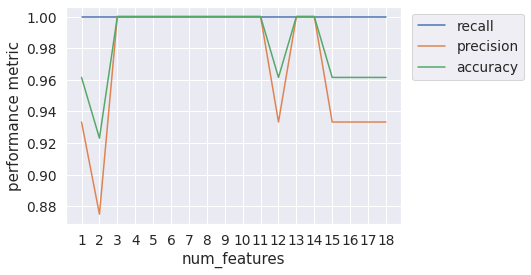

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1.25)
#draw line graphs with data
sns.lineplot(x='num_features',y='recall',data=pca_results)
sns.lineplot(x='num_features',y='precision',data=pca_results)
fig = sns.lineplot(x='num_features',y='accuracy',data=pca_results)
#tidy
fig.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.ylabel('performance metric')
plt.legend(labels=['recall','precision','accuracy'],loc='upper center',bbox_to_anchor=(1.2, 1))
plt.show()

We can see from the above visual that the recall of the decision tree algorithm does not seem to be affected by the reduction of input features into principle components. However the precision and the accuracy both seem to vary as more information is captured/lost by the increasing number of principle components. 

We can see that using principle components of 7 - 11 seems to give similar performance in terms of all three metrics. Although it should be noted that each time the PCA is run, slightly different results will be obtained.

We see that as the number of principle components approaches the total number of features in the input space, we appear to approch 100% accuracy,precision and recall. Whilst it is possible that using PCA has allowed the decision tree algorithm to give such amazing performance, it is to be considered skeptically as it seems more likely that the target information is being encoded into the principle components and so the results obtained may not be accurate of the algorithms performance. 

Instead we will take a conservative estimate for the best number of principle components to use. **We will choose 11 principle components** as this seems to be a good compromise between reducing dimensionality of the inputs and not encoding the target information into the principle components.

We will run the PCA again with our desired number of principle components and then we will use the principle compenents for the rest of the investigation:

In [18]:
pca = PCA(n_components=11)
pca.fit(x_train)
x_train_pca = pca.transform(x_train_scaled)

#create and fit the model
DTC_PCA = DecisionTreeClassifier()
DTC_PCA.fit(x_train_pca,y_train)

#make predictions
x_test_pca = pca.transform(x_test_scaled)
DTC_PCA_preds = DTC_PCA.predict(x_test_pca)

#get metrics
recall = round(recall_score(y_test,DTC_PCA_preds,zero_division='warn'),6)
precision = round(precision_score(y_test,DTC_PCA_preds),6)
accuracy = round(DTC_PCA.score(x_test_pca,y_test),6)

#add to results table
new_row = {'algorithm':'Decision Tree with PCA', 'recall':recall, 'precision':precision, 'accuracy':accuracy}
results = results.append(new_row,ignore_index=True)    

#### Random forest algorithm:  <a name="RF"></a>

Next we will try to build on the decsion tree classifer by implementing a random forest algorithm as this will hopefully offer increased performance when compared to the basic decision tree:

In [19]:
#optimise random forest/ decsion tree params
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train_pca,y_train)

#make predictions
RFC_preds = RFC.predict(x_test_pca)

#show metrics

recall = round(recall_score(y_test,RFC_preds,zero_division='warn'),6)
precision = round(precision_score(y_test,RFC_preds),6)
accuracy =  round(RFC.score(x_test_pca,y_test),6)

print('recall: ',recall)
print('precision: ',precision)
print('score/accuracy: ', accuracy)

#add to results table
new_row = {'algorithm':'Random forest - PCA', 'recall':recall, 'precision':precision, 'accuracy':accuracy}
results = results.append(new_row,ignore_index=True)


recall:  1.0
precision:  1.0
score/accuracy:  1.0


In [20]:
# random forest - no pca
RFC_no_pca = RandomForestClassifier()
RFC_no_pca.fit(x_train,y_train)

#make predictions
RFC_no_pca_preds = RFC_no_pca.predict(x_test)

#show metrics

recall = round(recall_score(y_test,RFC_no_pca_preds,zero_division='warn'),6)
precision = round(precision_score(y_test,RFC_no_pca_preds),6)
accuracy =  round(RFC_no_pca.score(x_test,y_test),6)

print('recall: ',recall)
print('precision: ',precision)
print('score/accuracy: ', accuracy)

#add to results table
new_row = {'algorithm':'Random forest - Without PCA', 'recall':recall, 'precision':precision, 'accuracy':accuracy}
results = results.append(new_row,ignore_index=True)


recall:  1.0
precision:  1.0
score/accuracy:  1.0


In [21]:
# use batching to obtain more accurate final metrics
results

,algorithm,recall,precision,accuracy
0,Decision Tree,1.0000,1.0000,1.0000
1,Naive Bayes,1.0000,0.7000,0.7692
2,SVC - Unscaled,0.1429,1.0000,0.5385
3,SVC - Scaled,0.7857,0.9167,0.4615
4,Logistic Regression,0.7857,0.8462,0.8077
5,Decision Tree with PCA,1.0000,1.0000,1.0000
6,Random forest - PCA,1.0000,1.0000,1.0000
7,Random forest - Without PCA,1.0000,1.0000,1.0000


We can see that when PCA is used, both the decision tree algorithm and the random forest algorithm give excellent results, although more investigation is needed to make sure the PCA is being applied correctly and not encoding the targets into the principle components in some fashion.

Also the logistic regression appears to give good results as well and so we will include this algorithm for further assessment too.

### Assessment with K-Fold cross validation:  <a name="assess"></a>

In this section we will use K-fold cross validation to obtain more accurate assessments of the performance of the top performing algorithms. We will rerun the decision tree alogorithms and the random forest algorithms, both with and without PCA using a k-fold cross validation process on the training data so we can obtain more accurate metrics for the models and evaluate them accordingly.

We will split each training set into 10 folds and then each algorithm will be fitted on 9/10ths of the data and then evaluated on the remaining 10th. This is repeated for all 10 combinations and then the evaluation metrics are averaged to give us a very accurate version of the recall,precision and accuracy/score for each algorithm.

We will apply the k-fold process on the three algorithms of interest also testing with and without the PCA transformed data where possible:

#### Decision Tree:

In [22]:
#evaluate decision tree without PCA
from sklearn.model_selection import cross_validate
#choose metrics
metrics_to_return = ['recall','precision','f1']
#assign classifier
DTC = DecisionTreeClassifier()
#get scores and means
scores = cross_validate(DTC, x_train, y_train, cv=10,scoring = metrics_to_return )
mean_recall = scores['test_recall'].mean()
mean_prec = scores['test_precision'].mean()
mean_score = scores['test_f1'].mean()

#add to summary table
batch_evals = pd.DataFrame(columns=['algorithm','recall','precision','score'])
new_row = {'algorithm':'Decision Tree - No PCA', 'recall':mean_recall, 'precision':mean_prec, 'score':mean_score}
batch_evals = batch_evals.append(new_row,ignore_index=True)


In [23]:
#evaluate decision tree with PCA
#assign classifier
DTC = DecisionTreeClassifier()
#get scores and means
scores = cross_validate(DTC, x_train_pca, y_train, cv=10,scoring = metrics_to_return )
mean_recall = scores['test_recall'].mean()
mean_prec = scores['test_precision'].mean()
mean_score = scores['test_f1'].mean()

#add to summary table
new_row = {'algorithm':'Decision Tree - With PCA', 'recall':mean_recall, 'precision':mean_prec, 'score':mean_score}
batch_evals = batch_evals.append(new_row,ignore_index=True)

#### Random Forest:

In [24]:
#evaluate random forest no PCA
#assign classifier
RFC_no_pca = RandomForestClassifier()
scores = cross_validate(RFC_no_pca, x_train, y_train, cv=10,scoring = metrics_to_return )
mean_recall = scores['test_recall'].mean()
mean_prec = scores['test_precision'].mean()
mean_score = scores['test_f1'].mean()

#add to summary table
new_row = {'algorithm':'Random Forest - No PCA', 'recall':mean_recall, 'precision':mean_prec, 'score':mean_score}
batch_evals = batch_evals.append(new_row,ignore_index=True)


In [25]:
#evaluate random forest with PCA
#assign classifier
RFC_pca = RandomForestClassifier()
scores = cross_validate(RFC_no_pca, x_train_pca, y_train, cv=10,scoring = metrics_to_return )
mean_recall = scores['test_recall'].mean()
mean_prec = scores['test_precision'].mean()
mean_score = scores['test_f1'].mean()

#add to summary table
new_row = {'algorithm':'Random Forest - with PCA', 'recall':mean_recall, 'precision':mean_prec, 'score':mean_score}
batch_evals = batch_evals.append(new_row,ignore_index=True)


#### Logistic Regression:

In [26]:
#evaluate Logistic Regression without PCA
#assign classifier
LR = LogisticRegression(solver='liblinear',max_iter=200)
scores = cross_validate(LR, x_train, y_train, cv=10,scoring = metrics_to_return )
mean_recall = scores['test_recall'].mean()
mean_prec = scores['test_precision'].mean()
mean_score = scores['test_f1'].mean()

#add to summary table
new_row = {'algorithm':'Logistic Regression - No PCA', 'recall':mean_recall, 'precision':mean_prec, 'score':mean_score}
batch_evals = batch_evals.append(new_row,ignore_index=True)

N.B It was tried to perform logistic regression with the PCA transformed data but when fed the PCA data, the logisitic regression would just predict zero for everything and so we were unable to get meaningful measures for the score metrics.

### Conclusions:  <a name="conclusion"></a>

Now we will evaluate the top performing algorithms as due to the k-fold cross validation, we should have an accurate picture for how well each algorithm performs for recall, precision and f-score.

In [27]:
batch_evals.sort_values(by='score',ascending=False,ignore_index=True)

,algorithm,recall,precision,score
0,Random Forest - with PCA,1.00000,0.983974,0.991652
1,Random Forest - No PCA,1.00000,0.916850,0.955279
2,Decision Tree - With PCA,1.00000,0.903755,0.948216
3,Decision Tree - No PCA,1.00000,0.867857,0.926353
4,Logistic Regression - No PCA,0.90303,0.698831,0.785960


We can see that the Random Forest Classifer with PCA performed on the data gives a really good performance of around 99%, followed by the Decision Tree Classifier also with PCA performed gives a score of around 97%. We see significant drops in accuracy when the normal data without PCA is used, and we see Logistic Regression does not perform as well as the rest.

Using this information we can see that for this problem and dataset, the random forest classifier should be used if the input data can be transformed using PCA. 